## Mental Health in Tech Surveys 2017 - 2019 
207 Final Project

Anjali Unnithan, Anusha Mohan, Lavanya Vijayan, Shalini Kunapuli

Import relevant packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install seaborn==0.11.0
!pip install pydot

In [3]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from IPython.core.display import Image, display
from io import StringIO
from sklearn import tree
import pydot

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2, f_regression, mutual_info_regression

from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm


Read in all the datasets

In [4]:
mh2017 = pd.read_csv("updated_mh_data_2017.csv", index_col=0)
mh2018 = pd.read_csv("updated_mh_data_2018.csv", index_col=0)
mh2019 = pd.read_csv("mh2019.csv", index_col=0)

Add a year column for each of the dataframes

In [5]:
mh2017['year'] = [2017] * len(mh2017)
mh2018['year'] = [2018] * len(mh2018)
mh2019['year'] = [2019] * len(mh2019)

Cleaning and renaming columns

In [6]:
mh2019 = mh2019.rename(columns={"**race": "race", 
                                '**comfortable_talk_coworkers_mental_physical': "comfortable_talk_coworkers_mental_physical",
                                "**discuss_mental_health_employer?": "discuss_mental_health_employer?",
                                "**conversation_employer_your_mental_health" : "conversation_employer_your_mental_health",
                                '**discuss_mental_health_coworkers' : "discuss_mental_health_coworkers",
                                '**conversation_coworkers_your_mental_health' : "conversation_coworkers_your_mental_health",
                                '**coworker_discuss_coworker_mental_health' : "coworker_discuss_coworker_mental_health",
                                '**conversation_coworkers_their_mental_health' : "conversation_coworkers_their_mental_health",
                                '**employer_physical_health_importance' : "employer_physical_health_importance",
                                '**employer_mental_health_importance' : "employer_mental_health_importance",
                                '**reveal_mental_health_client_affect_relationship?' : 'reveal_mental_health_client_affect_relationship?',
                                '**reveal_mental_health_coworker_affect_relationship?' : 'reveal_mental_health_coworker_affect_relationship?',
                                '**prev_employer_tech_company?' : 'prev_employer_tech_company?',
                                '**comfortable_discuss_physical_mental_health_prev_employer?' : 'comfortable_discuss_physical_mental_health_prev_employer?',
                                '**discuss_mental_health_prev_employer?' : 'discuss_mental_health_prev_employer?',
                                '**conversation_prev_employer_mental_health' : 'conversation_prev_employer_mental_health',
                                '**discuss_mental_health_prev_coworker?' : 'discuss_mental_health_prev_coworker?',
                                '**conversation_prev_coworker_mental_health' : "conversation_prev_coworker_mental_health",
                                '**prev_coworker_discuss_other_coworker_mental_health?' : "prev_coworker_discuss_other_coworker_mental_health?",
                                '**conversation_prev_coworkers_their_mental_health' : "conversation_prev_coworkers_their_mental_health",
                                '**prev_employer_importance_on_physical_health' : "prev_employer_importance_on_physical_health",
                                '**prev_employer_importance_on_mental_health' : "prev_employer_importance_on_mental_health",
                                '**diagnosed_disorders?' : "diagnosed_disorders?",
                                '**disorders_you_believe_you_have?' : "disorders_you_believe_you_have?", 
                                '**which_diagnosed_disorders?' : "which_diagnosed_disorders?",
                                '**openly_identified_person_with_mh_issue_work' : "openly_identified_person_with_mh_issue_work",
                                '**mh_identified_affect_career?' : "mh_identified_affect_career?", 
                                '**how_affect_career' : "how_affect_career",
                                '**how_team_react_if_knew_about_your_mh_disorder' : "how_team_react_if_knew_about_your_mh_disorder",
                                '**circumstance_unsupportive_response' : "circumstance_unsupportive_response",
                                '**observed_experienced_supportive_response' : "observed_experienced_supportive_response",
                                '**circumstance_supportive_response' : "circumstance_supportive_response",
                                '**tech_industry_support_employees_with_mh?' : "tech_industry_support_employees_with_mh?",
                                '**what_industry_can_do_improve_mh_support' : "what_industry_can_do_improve_mh_support", 
                                '**additional_comments' : "additional_comments",
                                '**willing_to_talk_more' : "willing_to_talk_more",
                                })

Combining 2017 and 2018 data

In [7]:
mh2017_2018 = pd.concat([mh2017, mh2018])


Combining 2017, 2018, and 2019 data

In [8]:
combined_df_789 = mh2017_2018.append([mh2019])
combined_df_789

#  Network ID Other.2 Other.3  \
0    e49fe87572831232dcfa51b376b22039  464b7a12f1     NaN     NaN   
1    a1eede444ac024928d247a8372d54931  464b7a12f1     NaN     NaN   
2    37d3fd67f62bd1e0a2dea4f9cd440d98  1eb7e0cb94     NaN     NaN   
3    519b759442c1cab0e9b5a8a1acb1b216  63852edbc4     NaN     NaN   
4    ef0af4927b575b1a3e607c11ca37870e  43237889f1     NaN     NaN   
..                                ...         ...     ...     ...   
347                               NaN         NaN     NaN     NaN   
348                               NaN         NaN     NaN     NaN   
349                               NaN         NaN     NaN     NaN   
350                               NaN         NaN     NaN     NaN   
351                               NaN         NaN     NaN     NaN   

        Start Date (UTC)    Submit Date (UTC)  \
0    2018-05-16 12:32:04  2018-05-16 12:42:40   
1    2018-05-16 12:31:13  2018-05-16 12:40:40   
2    2018-05-09 05:34:05  2018-05-09 05:46:04   
3    2018-05-04 23:19:14  2018-05-04 23:23:23   
4    2018-05-03 00:40:24  2018-05-03 00:53:20   
..                   ...                  ...   
347                  NaN                  NaN   
348                  NaN                  NaN   
349                  NaN                  NaN   
350                  NaN                  NaN   
351                  NaN                  NaN   

                                   additional_comments   age  \
0                                                  NaN  27.0   
1                                                  NaN  31.0   
2                                                  NaN  36.0   
3                                                  NaN  22.0   
4                                                 nope  52.0   
..                                                 ...   ...   
347                                                NaN  27.0   
348                                                NaN  48.0   
349                                       sdsdsdsdsdsd  50.0   
350                                                 no  30.0   
351  I've had to drive all of the progress in menta...  24.0   

    anonymity_protected asking_for_medical_leave  ...  \
0          I don't know             I don't know  ...   
1          I don't know             I don't know  ...   
2                   Yes                Difficult  ...   
3                   Yes                Difficult  ...   
4                   NaN                      NaN  ...   
..                  ...                      ...  ...   
347        I don't know       Somewhat difficult  ...   
348                 NaN                      NaN  ...   
349                 NaN                      NaN  ...   
350                 Yes                Difficult  ...   
351                 Yes       Somewhat difficult  ...   

    sought_treatment_for_mh_issue_from_professional tech_company?  \
0                                                 1             1   
1                                                 0             1   
2                                                 1             1   
3                                                 1             1   
4                                                 1           NaN   
..                                              ...           ...   
347                                               0         False   
348                                               0           NaN   
349                                               0           NaN   
350                                               0          True   
351                                               1          True   

    tech_industry_support_employees_with_mh? us_state_residence us_state_work  \
0                                        1.0                NaN           NaN   
1                                        2.0                NaN           NaN   
2                                        1.0           Missouri      Missouri   
3          

In [9]:
combined_df_789 = combined_df_789.drop(columns = ['Other.2', 'Other.3'])

Check nulls across each columns (for 2017-2019 dataset)

In [10]:
print(combined_df_789.isna().sum().sort_values().to_string())

family_history_of_mental_illness?                               0
willing_to_share_mh_friendsandfamily                            0
sought_treatment_for_mh_issue_from_professional                 0
self_employed                                                   0
mh_issue_interferes_with_work_when_treated                      0
mh_issue_interferes_with_work_when_not_treated                  0
have_previous_employers                                         0
currently_have_mental_health_disorder?                          0
bring_up_physical_health_in_interview                           0
bring_up_mental_health_in_interview                             0
year                                                            0
bad_response_to_mh_issue_in_workplaces?                         2
openly_identified_person_with_mh_issue_work                     2
age                                                             2
how_team_react_if_knew_about_your_mh_disorder                   2
willing_to

2017-2018 data with selected feature columns

In [11]:
filtered_combined_df_789 = combined_df_789[['currently_have_mental_health_disorder?', 'self_employed', 'year',
       'have_previous_employers', 'bring_up_mental_health_in_interview',
       'bring_up_physical_health_in_interview',
       'willing_to_share_mh_friendsandfamily',
       'mh_issue_interferes_with_work_when_not_treated',
       'mh_issue_interferes_with_work_when_treated',
       'family_history_of_mental_illness?',
       'sought_treatment_for_mh_issue_from_professional', 'age',
       'tech_industry_support_employees_with_mh?',
       'openly_identified_person_with_mh_issue_work','willing_to_talk_more',
       'observed_experienced_supportive_response',
       'how_team_react_if_knew_about_your_mh_disorder',
       'bad_response_to_mh_issue_in_workplaces?', 'gender',
       'mental_disorder_in_past?', 'aware_of_mh_care_by_prev_employers',
       'prev_employers_provide_mh_resources',
       'prev_employers_anonymity_protected',
       'discuss_mental_health_prev_employer?',
       'discuss_mh_with_prev_supervisor', 'discuss_mh_with_prev_coworkers',
       'prev_employer_importance_on_physical_health',
       'prev_employer_importance_on_mental_health',
       'comfortable_discuss_physical_mental_health_prev_employer?',
       'previous_employers_provided_mh_benefits',
       'prev_employers_discuss_mental_health', 'prev_employer_tech_company?',
       'discuss_mental_health_prev_coworker?',
       'prev_coworker_discuss_other_coworker_mental_health?',
       'discuss_mental_health_employer?',
       'comfortable_discussing_with_supervisor', 'anonymity_protected',
       'comfortable_discussing_with_coworkers',
       'employer_offers_mental_health_resources',
       'comfortable_talk_coworkers_mental_physical',
       'employer_discussed_mental_health', 'employer_mental_health_importance',
       'provides_mental_health_benefits', 'role_within_tech?', 'tech_company?',
       'num_employees', 'employer_physical_health_importance',
       'asking_for_medical_leave', 'discuss_mental_health_coworkers',
       'coworker_discuss_coworker_mental_health',
       'bring_up_mental_health_in_interview_why',
       'observations_of_others_less_likely_to_reveal_mh_issues',
       'know_mental_health_options', 'bring_up_physical_health_in_interview_why',
       'what_industry_can_do_improve_mh_support', 
       'race']]

Drops rows where there are null values in the target column

In [12]:

filtered_combined_df_789 = filtered_combined_df_789.dropna(subset = ['comfortable_discussing_with_supervisor'])
filtered_combined_df_789

currently_have_mental_health_disorder?  self_employed  year  \
0                                 Possibly              0  2017   
1                                 Possibly              0  2017   
2                                      Yes              0  2017   
3                                      Yes              0  2017   
5                                       No              0  2017   
..                                     ...            ...   ...   
345                                     No              0  2019   
346                                     No              0  2019   
347                               Possibly              0  2019   
350                               Possibly              0  2019   
351                                    Yes              0  2019   

     have_previous_employers bring_up_mental_health_in_interview  \
0                          1                                  No   
1                          1                                  No   
2                          1                                  No   
3                          0                                  No   
5                          1                                  No   
..                       ...                                 ...   
345                        0                               Maybe   
346                        0                                  No   
347                        1                                  No   
350                        1                                  No   
351                        1                                 Yes   

    bring_up_physical_health_in_interview  \
0                                     Yes   
1                                     Yes   
2                                   Maybe   
3                                      No   
5                                   Maybe   
..                                    ...   
345                                   Yes   
346                                    No   
347                                 Maybe   
350                                    No   
351                                 Maybe   

     willing_to_share_mh_friendsandfamily  \
0                                       5   
1                                       4   
2                                       5   
3                                      10   
5                                       5   
..                                    ...   
345                                    10   
346                                     5   
347                                     9   
350                                     2   
351                                    10   

    mh_issue_interferes_with_work_when_not_treated  \
0                                        Sometimes   
1                                        Sometimes   
2                                        Sometimes   
3                                            Often   
5                             Not applicable to me   
..                                             ...   
345                                          Often   
346                                          Often   
347                                      Sometimes   
350                                          Often   
351                                          Often   

    mh_issue_interferes_with_work_when_treated  \
0                                    Sometimes   
1                         Not applicable to me   
2                                    Sometimes   
3                                    Sometimes   
5                                       Rarely   
..                                         ...   
345                                  Sometimes   
346                       Not applicable to me   
347                                  Sometimes   
350                                      Often   
351                                  Sometimes   

    family_history_of_mental_illness?  ...  \
0   

We want to check to see how many people who did not have a previous employer.


In [13]:
filtered_combined_df_789['have_previous_employers'].value_counts()

1    1129
0     179
Name: have_previous_employers, dtype: int64

We want to only select/analyze the people who do have a previous employer

In [14]:
filtered_combined_df_789 = filtered_combined_df_789[filtered_combined_df_789['have_previous_employers'] == 1]

Some of the columns that we have are a mix of numeric and string types. Below we will encode these so they are all the same type. We will also fill NA (null values will be encoded as I don't know). We choose to do this instead of imputing.

The three columns below are free responses so we will delete those columns because there are too many response options. For future work, we could possibly use these columns to do sentiment analysis.

In [15]:
filtered_combined_df_789 = filtered_combined_df_789.drop(columns=[
    'bring_up_mental_health_in_interview_why',
    'bring_up_physical_health_in_interview_why',
    'what_industry_can_do_improve_mh_support'])

We will fill na for the three columns that have null values in the above output


In [16]:
filtered_combined_df_789['know_mental_health_options'] = filtered_combined_df_789['know_mental_health_options'].fillna('Unspecified')
filtered_combined_df_789['observations_of_others_less_likely_to_reveal_mh_issues'] = filtered_combined_df_789['observations_of_others_less_likely_to_reveal_mh_issues'].fillna('Unspecified')
filtered_combined_df_789['mental_disorder_in_past?'] = filtered_combined_df_789['mental_disorder_in_past?'].fillna("Unspecified")
filtered_combined_df_789['race'] = filtered_combined_df_789['race'].fillna("I prefer not to answer")

Drop null values from remaining rows:

In [17]:
# drop the row that have nulls
filtered_combined_df_789 = filtered_combined_df_789.dropna()

Create a function encoding_789 that takes in a dataframe and encodes categorical data as numeric so that we can model.

In [18]:
def encoding_789(df):
    X = df

    #Making survey values consistent amongst all years
    X = X.replace({'willing_to_share_mh_friendsandfamily': 
    {0 : "Not applicable to me (I do not have a mental illness)", 1 : "Not open at all", 
    2:"Not open at all", 3 : "Somewhat not open", 
    4 : "Somewhat not open", 5 : "Neutral", 6 : "Somewhat open", 
    7 : "Somewhat open", 8 : "Very open",9 : "Very open", 10 : "Very open"}})

    Female = ['Female', 'female', 'Female ', 'Woman', 'woman', 'F', 'f', 'I identify as female', '*shrug emoji* (F)', 'Cis woman', 'Female (cisgender)',  'Cis-Female', 'Cisgendered woman', 'She/her/they/them', 'Cis female ', 'cisgender female' ]
    Male = ['male', 'Male', 'Ostensibly Male', 'male, born with xy chromosoms', 'Malel', 'M','MALE','m','Cis-male', 'Male ', 'cis male','Cis Male','Man', 'Cisgender male', 'SWM']
    TransFemale = ['Trans woman', 'Trans female']
    TransMale = ['Trans man']
    Trans = ['transgender']
    NonBinary = ['Nonbinary','Male (or female, or both)','Agender', 'non binary', 'Female/gender non-binary.', 'Demiguy', 'non-binary', 'She/her/they/them', 'NB', 'Nonbinary/femme', 'gender non-conforming woman']
    GenderFluid = ['genderfluid', 'Genderqueer', 'Genderfluid']
    Other = ['nan' , 'Other', 'none']

    X.loc[X.gender.isin(Female), 'gender'] = 'Female'
    X.loc[X.gender.isin(Male), 'gender'] = 'Male'
    X.loc[X.gender.isin(TransFemale), 'gender'] = 'Trans Female'
    X.loc[X.gender.isin(TransMale), 'gender'] = 'Trans Male'
    X.loc[X.gender.isin(Trans), 'gender'] = 'Transgender'
    X.loc[X.gender.isin(NonBinary), 'gender'] = 'Nonbinary'
    X.loc[X.gender.isin(GenderFluid), 'gender'] = 'Gender Fluid'
    X.loc[X.gender.isin(Other), 'gender'] = 'Other'

    X = X.replace({'gender': {'male': 'Male',
                            'female' : "Female",
                            'non_binary' : 'Nonbinary',
                            'trans_female' : 'Trans Female',
                            'gender_fluid' : 'Gender Fluid',
                            'other' : "Other",
                            'Cisgender Male' : 'Male', 
                            'Cisgender Female' : "Female", 
                            'Gender-fluid' : 'Gender Fluid', 
                            'Transgender Female' : "Trans Female",
                            'Transgender (unspecified)': 'Transgender'}})

    #Columns 0-13
    X = X.replace({'currently_have_mental_health_disorder?' : {'Yes' : 2,  'No' : 1, "Don't Know" : 0, "Possibly" : 3}})
    X = X.replace({'bring_up_mental_health_in_interview' : {'Yes' : 1, 'No' : 0, 'Maybe' : 2}})
    X = X.replace({'bring_up_physical_health_in_interview' : {'Yes' : 1, 'No' : 0, 'Maybe' : 2}})
    X = X.replace({'mh_issue_interferes_with_work_when_not_treated' : {'Not applicable to me' : 0, 'Sometimes' : 1, 'Often' : 2, 'Rarely': 3, 'Never' : 4}})
    X = X.replace({'mh_issue_interferes_with_work_when_treated' : {'Not applicable to me' : 0, 'Sometimes' : 1, 'Often' : 2, 'Rarely': 3, 'Never' : 4}})
    X = X.replace({'family_history_of_mental_illness?' : {'No' : 0, 'Yes': 1, "I don't know" : 2}})
        
    #Columns 13-26 (gender already above)
    X = X.replace({'discuss_mental_health_prev_employer?' : {'1.0' : 1, '0.0' : 0}})
    X = X.replace({'observed_experienced_supportive_response' : {'Yes, I experienced' : 1, 'Yes, I observed' : 2, 'Maybe/Not sure' : 3, 'No' : 4}})
    X = X.replace({'bad_response_to_mh_issue_in_workplaces?' : {'No' : 0, 'Maybe/Not sure' : 3, 'Yes, I experienced' : 1, 'Yes, I observed' : 2}})
    X = X.replace({'mental_disorder_in_past?' : {'Yes' : 1, 'Possibly'  : 2, 'No' : 0, 'Unspecified': 3, "Don't Know" : 4}})
    X = X.replace({'aware_of_mh_care_by_prev_employers' : {'I was aware of some' : 1, 'Yes, I was aware of all of them' : 2, 'No, I only became aware later' : -1, 'N/A (was not aware)' : -2, 'N/A (none offered)' :-3 }})
    X = X.replace({"prev_employers_provide_mh_resources" : {'Some did' : 2,  'Yes, they all did' : 1,  'None did' : 0}})
    X = X.replace({'prev_employers_anonymity_protected': {"I don't know":0, 'Yes, always':1, 'Sometimes':2, 'No':3}})
    X = X.replace({"discuss_mh_with_prev_supervisor" : {'No, none of my previous supervisors' : 2, 'Some of my previous supervisors' : 4, 'Yes, all of my previous supervisors' : 6, "I don't know" : 7}} )
    X = X.replace({'discuss_mh_with_prev_coworkers': {'At some of my previous employers': 'Some of my previous employers'}})
    X = X.replace({"discuss_mh_with_prev_coworkers" : {'No, at none of my previous employers' : 0, 'Yes, at all of my previous employers' : 1, 'Some of my previous employers' : 2}})
    
    #Columns 26-39
    X = X.replace({'prev_employer_tech_company?' : {'1.0' : 1, '0.0' : 0}})
    X = X.replace({'discuss_mental_health_prev_coworker?' : {'1.0' : 1, '0.0' : 0}})
    X = X.replace({'prev_coworker_discuss_other_coworker_mental_health?' : {'1.0' : 1, '0.0' : 0}})
    X = X.replace({'discuss_mental_health_employer?' : {'1.0' : 1, '0.0' : 0}})
    X = X.replace({'comfortable_discuss_physical_mental_health_prev_employer?': 
        {'Physical health': 0, 'Same level of comfort for each' : 1, 'Mental health' : 2}})
    X = X.replace({'previous_employers_provided_mh_benefits' : {'Some did' : 0, 'No, none did' : 1, 'Yes, they all did' : 2, "I don't know" : 3}})
    X = X.replace({'prev_employers_discuss_mental_health' : {'Some did' : 0, 'None did' : 1, 'Yes, they all did' : 2, "I don't know" : 3}})
    X = X.replace({"comfortable_discussing_with_supervisor" : {'Yes' : 1, 'No' : 0, 'Maybe' : 2}})
    X = X.replace({"comfortable_discussing_with_coworkers" : {'Yes' : 1, 'No' : 0, 'Maybe' : 2}})
    X = X.replace({'anonymity_protected' : {'No' : 0, 'Yes': 1, "I don't know" : 2}})
    X = X.replace({'employer_offers_mental_health_resources' : {'No' : 0, 'Yes': 1, "I don't know" : 2}})
    X = X.replace({'comfortable_talk_coworkers_mental_physical': 
        {0 : 'Physical health', 1 : 'Same level of comfort for each', 2: 'Mental health'}})

    #Columns 39 onwards
    X = X.replace({'comfortable_talk_coworkers_mental_physical':{'Same level of comfort for each':1, 'Physical health':2, 'Mental health':3}})
    X = X.replace({'employer_discussed_mental_health':{'No':0, 'Yes':1, "I don't know":2}})
    X = X.replace({'provides_mental_health_benefits':{'No':0, 'Yes':1, "I don't know":2, 'Not eligible for coverage / NA':3}})
    X = X.replace({'asking_for_medical_leave':{"I don't know":-1, 'Very easy':5, 'Somewhat easy':4, 'Neither easy nor difficult':3, 'Somewhat difficult':2, 'Difficult':1}})
    X = X.replace({'discuss_mental_health_coworkers':{'1.0' : 1, '0.0' : 0}})
    X = X.replace({'coworker_discuss_coworker_mental_health': {'1.0' : 1, '0.0' : 0}})
    X = X.replace({'observations_of_others_less_likely_to_reveal_mh_issues': {'No':0, 'Yes':1, 'Maybe':2, 'Unspecified':3}})
    X = X.replace({'know_mental_health_options': {'Yes':1, 'No':0, 'Unspecified':2}})
    X = X.replace({'role_within_tech?': {'1.0' : 1, '0.0' : 0}})
    X = X.replace({'tech_company?': {'1.0' : 1, '0.0' : 0}})   
    X = X.replace({'race': {'I prefer not to answer': 0, 'White' : 1, 'Asian' :2,'Black or African American' : 3, 'American Indian or Alaska Native' : 4, 'Hispanic' :5, 'Caucasian' : 1, 'More than one of the above': 6}})
            

    X = X.replace({'willing_to_share_mh_friendsandfamily' : {'Somewhat open' : 4, 'Not applicable to me (I do not have a mental illness)' : 0, 'Very open' : 5, 'Not open at all' : 1, 'Neutral' : 3, 'Somewhat not open' : 2}})

    X = X.replace({'gender' : {'Male':0, 'Female': 1, 'Nonbinary': 2, 'Trans Female': 3, 'Gender Fluid': 4, 'Other': 5, 'Trans Male': 6, 'Transgender':7}})        
    
    X = X.replace({'num_employees' : {'26-100' : 3, '6-25' : 2, 'More than 1000': 6, '100-500' : 4, '500-1000' : 5, '1-5' : 1}})
    
    return X

Call the function encoding_789 with filtered_combined_df_789 as input

In [19]:
encoded_df_789 = encoding_789(filtered_combined_df_789)

Dropping self employed and previous employers columns because they are not relevant columns for our analysis


In [20]:
encoded_df_789 = encoded_df_789.drop(columns = ['self_employed', 'have_previous_employers'])

Now that our data is all numeric with no null values, we can start modeling.

### Modeling with 2017-2019 data

We will try out the following models:
- decision trees
- random forests
- logistic regression (multinomial)

Our target variable is: comfortable_discussing_with_supervisor

Setting up our data and our labels:

In [21]:
X = encoded_df_789.loc[:, encoded_df_789.columns!='comfortable_discussing_with_supervisor']
y = encoded_df_789.loc[:, 'comfortable_discussing_with_supervisor']

In [22]:
y

0      1
1      2
2      1
5      2
6      1
      ..
342    2
344    0
347    0
350    0
351    2
Name: comfortable_discussing_with_supervisor, Length: 1115, dtype: int64

Splitting up the data for both training and testing.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

Logistic Regression model with L1 penalty:

In [24]:
lr_L1 = LogisticRegression(random_state=0, tol=0.015, penalty='l1', solver="liblinear", multi_class="ovr")
lr_L1.fit(X_train, y_train)
preds_L1 = lr_L1.predict(X_test)

print("Test Data Overall Accuracy: ", lr_L1.score(X_test, y_test))

Test Data Overall Accuracy:  0.6053811659192825


Logistic Regression model with L2 penalty:

In [25]:
lr_L2 = LogisticRegression(random_state=0, tol=0.015, penalty='l2', solver="liblinear", multi_class="ovr")
lr_L2.fit(X_train, y_train)
preds_L2 = lr_L2.predict(X_test)

print("Test Data Overall Accuracy: ", lr_L2.score(X_test, y_test))

Test Data Overall Accuracy:  0.42152466367713004


Classication Reports for Logistic Regession:

In [26]:
print(classification_report(preds_L1, y_test))

              precision    recall  f1-score   support

           0       0.64      0.49      0.56        69
           1       0.79      0.70      0.74       105
           2       0.36      0.55      0.43        49

    accuracy                           0.61       223
   macro avg       0.59      0.58      0.58       223
weighted avg       0.65      0.61      0.62       223



In [27]:
print(classification_report(preds_L2, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.42      0.59       223
           2       0.00      0.00      0.00         0

    accuracy                           0.42       223
   macro avg       0.33      0.14      0.20       223
weighted avg       1.00      0.42      0.59       223



Decision Tree Model:

Accuracy: 0.47085201793721976
Output: mental_health_2017-2019_tree.jpg


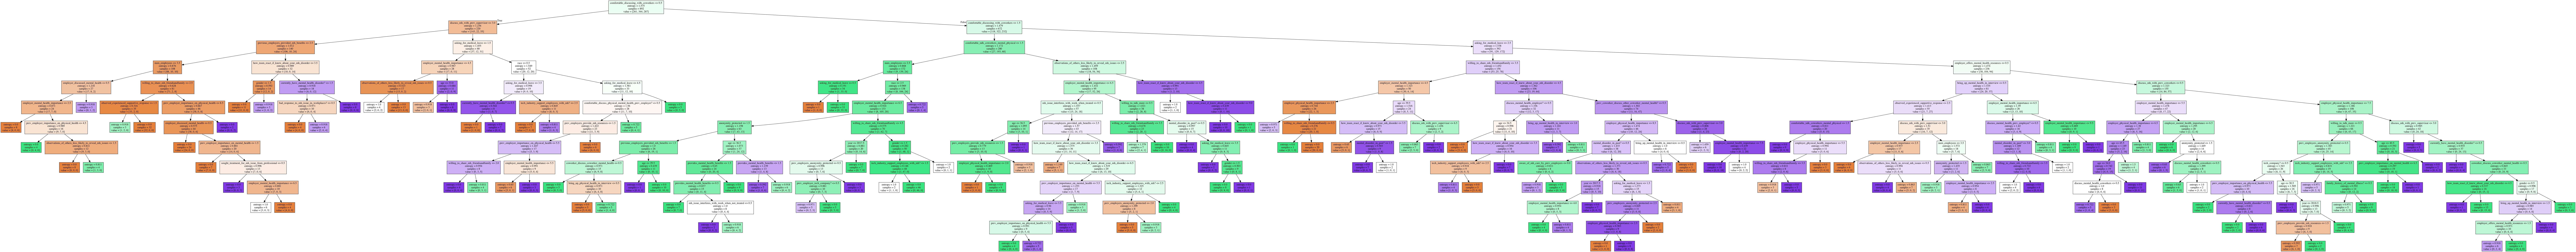

In [28]:
dtc = DecisionTreeClassifier(criterion='entropy', min_samples_split=8, random_state=0)
dtc.fit(X_train, y_train)
print ('Accuracy:', dtc.score(X_test, y_test))

# Export the trained tree so we can look at it.
output_name = 'mental_health_2017-2019_tree.jpg'
dot_data = StringIO()
feature_cols = X_train.columns

tree.export_graphviz(dtc, out_file=dot_data, feature_names=feature_cols, filled = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
graph.write_jpg(output_name)

print ('Output:', output_name)
display(Image(filename=output_name))

Random Forest Model:

In [29]:
#Random Forests Classifier
clf = RandomForestClassifier(n_estimators=50, random_state=0, min_samples_split= 2)  
clf.fit(X_train, y_train) 
clf.score(X_test,y_test) 

0.5695067264573991

Showing Feature Importance based on Random Forest Model:

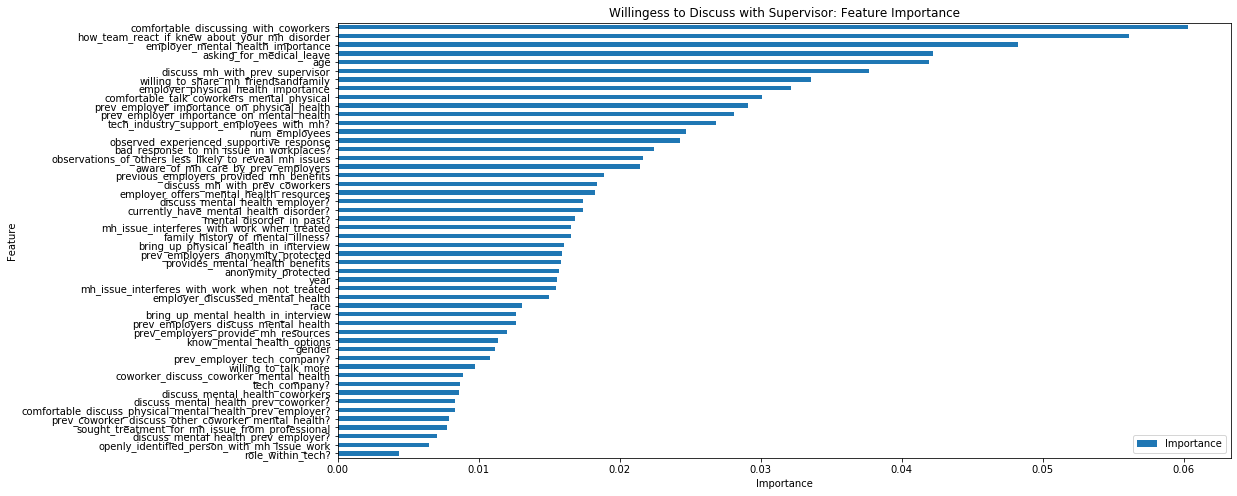

In [30]:
feat_impt = list(clf.feature_importances_)

y_df = pd.DataFrame({"Feature":X.columns,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
dim = (16,8)
fig = plt.figure(figsize=dim)
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Willingess to Discuss with Supervisor: Feature Importance")
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

Correlation Matrix for Features:

In [31]:
# corr = X.corr() 
# fig = plt.figure(figsize=(16,16))
# ax = fig.add_subplot(111)
# cax = ax.matshow(corr,vmin=-1,vmax=1,
#                  cmap=sns.diverging_palette(10, 500, as_cmap=True))
# fig.colorbar(cax)
# names = X.columns
# ticks = np.arange(0,len(names),1)
# ax.set_xticks(ticks)
# ax.set_yticks(ticks)
# ax.set_xticklabels(names,rotation='vertical')
# ax.set_yticklabels(names)
# ax.set_title("Correlation Matrix of Features",y=1.2)

# plt.show()

Dropping gender feature from data due to low feature importance and disproportionate representations of genders

In [32]:
Xcopy = X.copy()
Xcopy = Xcopy.drop(columns=['gender'])
ycopy = y.copy()
Xcopy_train, Xcopy_test, ycopy_train, ycopy_test = train_test_split(Xcopy, ycopy, test_size=0.2, random_state=0) 


Logistic Regression with L1 penalty without the gender feature:

In [33]:
strength = 0.001
lr_1 = LogisticRegression(C=1/strength, solver="liblinear", multi_class="ovr", penalty="l1", tol=0.015)
lr_1.fit(Xcopy_train, ycopy_train)
preds = lr_1.predict(Xcopy_test)

print("Test Data Overall Accuracy (L1 Regularization With Strength", strength, "):", lr_1.score(Xcopy_test, ycopy_test))


Test Data Overall Accuracy (L1 Regularization With Strength 0.001 ): 0.600896860986547


Logistic Regression with L2 penalty without the gender feature:

In [34]:
lr_2 = LogisticRegression(C=1/0.5, random_state=0, tol=0.015)
lr_2.fit(Xcopy_train, ycopy_train)
preds = lr_2.predict(Xcopy_test)

print("Test Data Overall Accuracy (L2 Regularization):", lr_2.score(Xcopy_test, ycopy_test))

Test Data Overall Accuracy (L2 Regularization): 0.42152466367713004


Decision Tree Model  without the gender feature:

In [35]:
dtc_3 = DecisionTreeClassifier(criterion='gini', min_samples_leaf= 15, min_samples_split=15, max_depth = 10, random_state=0)
dtc_3.fit(Xcopy_train, ycopy_train)
print ('Accuracy:', dtc_3.score(Xcopy_test, ycopy_test))

Accuracy: 0.5022421524663677


Output: mental_health_2017-2019_tree_without_gender.jpg


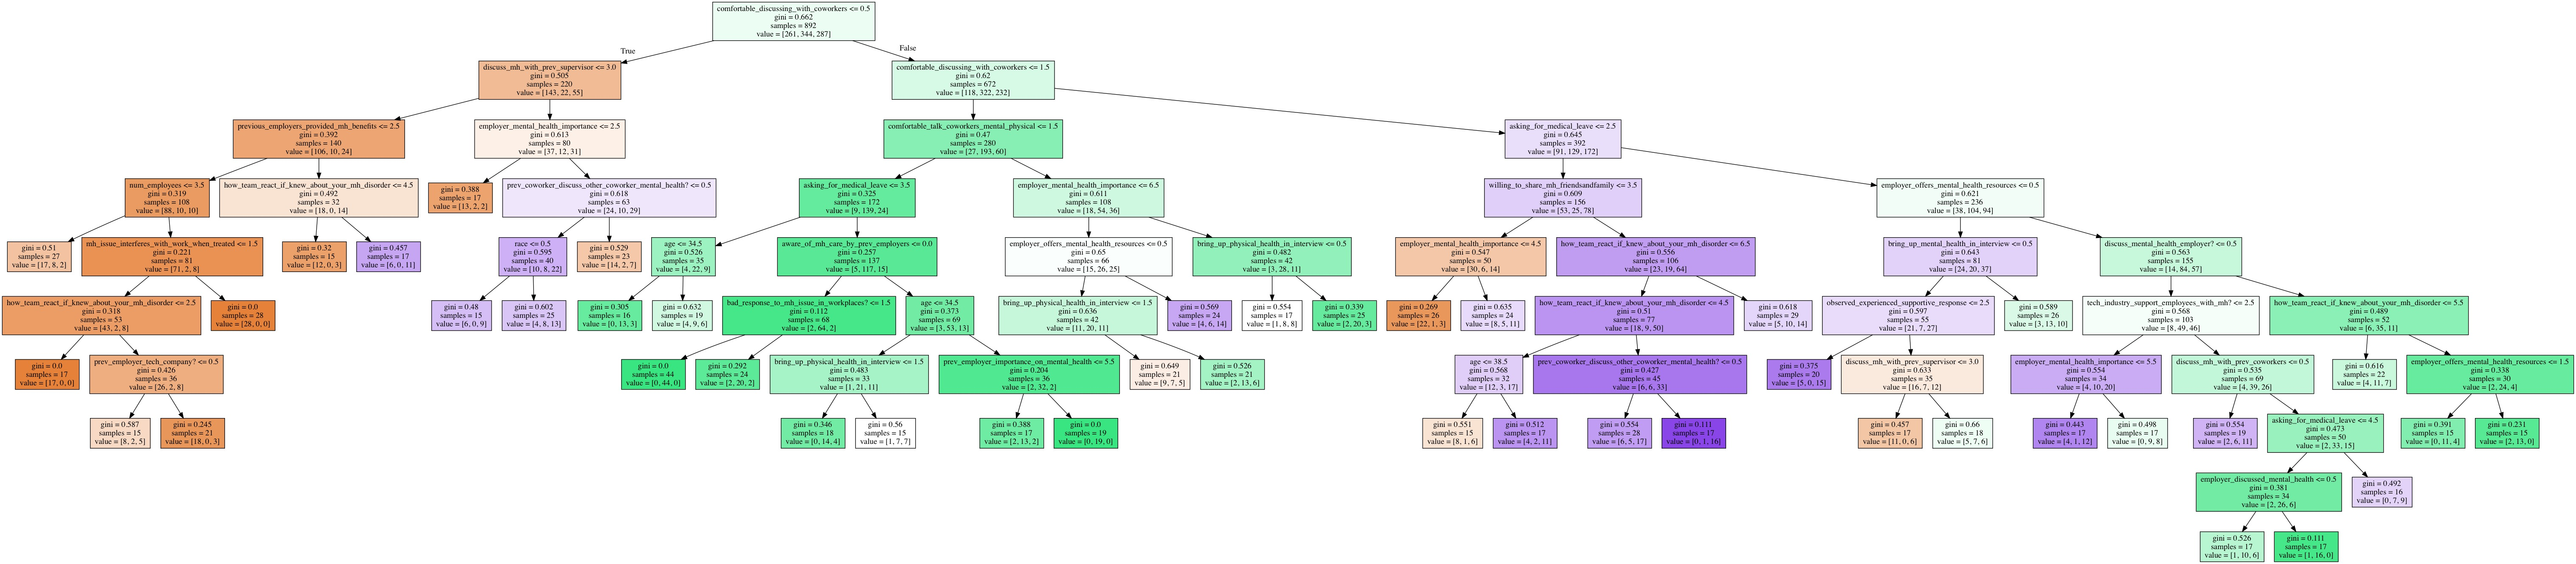

In [36]:
# Export the trained tree so we can look at it.
output_name = 'mental_health_2017-2019_tree_without_gender.jpg'
dot_data = StringIO()
feature_cols = Xcopy_train.columns

tree.export_graphviz(dtc_3, out_file=dot_data, feature_names=feature_cols, filled = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
graph.write_jpg(output_name)

print ('Output:', output_name)
display(Image(filename=output_name))

Random Forest model  without the gender feature:

In [37]:
clf_2 = RandomForestClassifier(n_estimators=100, criterion = 'gini', random_state=0)  
clf_2.fit(Xcopy_train, ycopy_train) 
clf_2.score(Xcopy_test,ycopy_test) 

0.5874439461883408

Conduct GridSearchCV to obtain best parameters without resampling

In [38]:

parameters = {'criterion': ["gini", "entropy"], 
              'n_estimators':[20, 30, 40, 50, 100, 150, 200],
              'max_features' : ["auto", "sqrt", "log2"],
              'min_samples_split' : [2, 3, 4],
              'random_state': [0]}
              
grid_search = GridSearchCV(clf, parameters, cv = 5)
grid_search.fit(X_train, y_train)
scores = grid_search.cv_results_['mean_test_score']
print(max(scores))


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.6076233183856502


In [39]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 0}


Best parameters and accuracy without resampling obtained from GridSearchCV:

Highest Accuracy : 0.6076233183856502

Best parameters: {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 0}

#### Resampling Data by Class

Conduct resampling to generate more data and balance the distribution across classes

In [40]:
yes = encoded_df_789[encoded_df_789['comfortable_discussing_with_supervisor']==1]
maybe = encoded_df_789[encoded_df_789['comfortable_discussing_with_supervisor']==2]
no = encoded_df_789[encoded_df_789['comfortable_discussing_with_supervisor']==0]
 
df_yes_resampled = resample(yes, 
                                 replace=True,     
                                 n_samples=800,    
                                 random_state=0) 

df_maybe_resampled = resample(maybe, 
                                 replace=True,     
                                 n_samples=800,    
                                 random_state=0) 
 
df_no_resampled = resample(no, 
                                 replace=True,     
                                 n_samples=800,    
                                 random_state=0) 
 
df_resampled = pd.concat([df_yes_resampled, df_maybe_resampled, df_no_resampled])
 
# Display new class counts
df_resampled["comfortable_discussing_with_supervisor"].value_counts()

1    800
2    800
0    800
Name: comfortable_discussing_with_supervisor, dtype: int64

Separate input features and target variable

In [41]:
y_resampled = df_resampled.comfortable_discussing_with_supervisor
X_resampled = df_resampled.drop('comfortable_discussing_with_supervisor', axis=1)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0) 


Conduct Logistic Regression With L1 Regularization on Resampled Data

In [42]:
strength_L1 = 0.001
lr_1_r = LogisticRegression(C=1/strength_L1, solver="liblinear", multi_class="ovr", penalty="l1", tol=0.015)
lr_1_r.fit(X_train_r, y_train_r)
preds_r = lr_1_r.predict(X_test_r)

print("Test Data Overall Accuracy (L1 Regularization With Strength", strength_L1, "):", lr_1_r.score(X_test_r, y_test_r))

Test Data Overall Accuracy (L1 Regularization With Strength 0.001 ): 0.6208333333333333


Conduct Logistic Regression With L2 Regularization on Resampled Data

In [43]:
strength_L2 = 0.5
lr_2_r = LogisticRegression(C=1/strength_L2, random_state=0, tol=0.015)
lr_2_r.fit(X_train_r, y_train_r)
preds_r = lr_2_r.predict(X_test_r)

print("Test Data Overall Accuracy (L2 Regularization):", lr_2_r.score(X_test_r, y_test_r))


Test Data Overall Accuracy (L2 Regularization): 0.325


Build Decision Tree Classifier on the Resampled Data

In [44]:
dtc_3_r = DecisionTreeClassifier(criterion='gini', min_samples_leaf= 15, min_samples_split=15, max_depth = 10, random_state=0)
dtc_3_r.fit(X_train_r, y_train_r)
print ('Accuracy:', dtc_3_r.score(X_test_r, y_test_r))

Accuracy: 0.6729166666666667


Build Random Forest Classifier on the Resampled Data

In [45]:
clf_2_r = RandomForestClassifier(n_estimators=100, criterion = 'gini', random_state=0)  
clf_2_r.fit(X_train_r, y_train_r) 
clf_2_r.score(X_test_r,y_test_r) 

0.93125

Show Feature Importances for Random Forest Classifier for Resampled Data

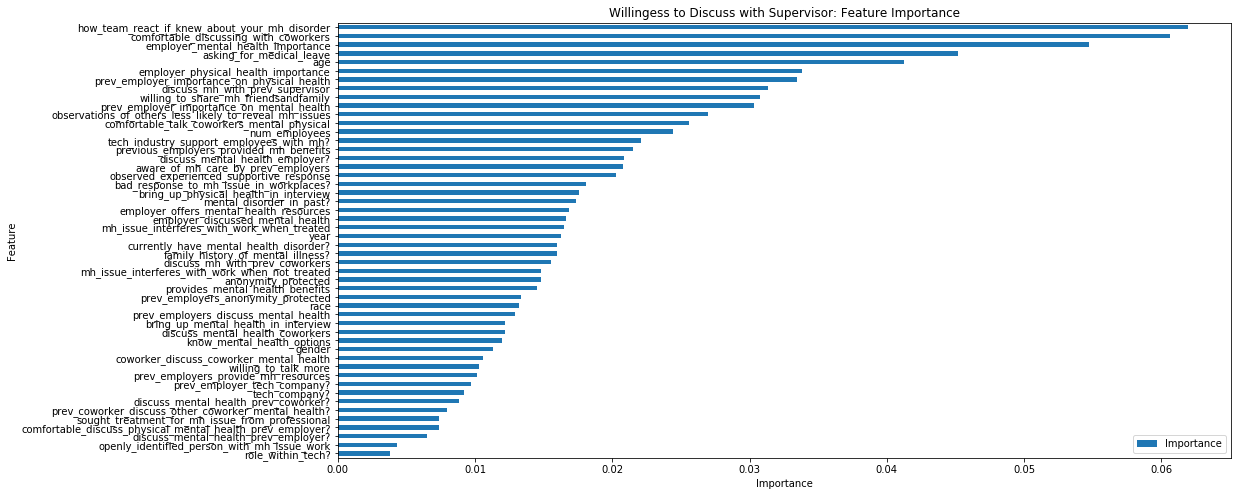

In [46]:
feat_impt_r = list(clf_2_r.feature_importances_)

y_df_r = pd.DataFrame({"Feature":X_train_r.columns,"Importance":feat_impt_r})
y_sort_df_r = y_df_r.sort_values("Importance")
dim = (16,8)
fig_2_r = plt.figure(figsize=dim)
ax2_r = fig_2_r.add_subplot(111)

y_sort_df_r.plot(kind='barh',ax=ax2_r,x="Feature",y="Importance")

ax2_r.set_title("Willingess to Discuss with Supervisor: Feature Importance")
ax2_r.set_ylabel("Feature")
ax2_r.set_xlabel("Importance")

plt.show()

Run GridSearchCV on random forest classifier for resampled data to detemine best parameters and best score

In [47]:
parameters = {'criterion': ["gini", "entropy"], 
              'n_estimators':[20, 30, 40, 50, 100, 150, 200],
              'max_features' : ["auto", "sqrt", "log2"],
              'min_samples_split' : [2, 3, 4],
              'random_state': [0]}
              
grid_search_r = GridSearchCV(clf_2_r, parameters, cv = 5)
grid_search_r.fit(X_train_r, y_train_r)
scores_r = grid_search_r.cv_results_['mean_test_score']
print(max(scores_r))

0.9036458333333334


In [48]:
resampled_best_params = grid_search_r.best_params_
print(resampled_best_params)

{'criterion': 'entropy', 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 150, 'random_state': 0}


Best parameters for random forest classifier with data resampled by class: 

'criterion': 'entropy', 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 150, 'random_state': 0

Try different sample sizes for resampling the data by class

In [67]:
num_samples = [400, 450, 500,600,700,800]
scores_rf = []
for samp in num_samples:
        yes = encoded_df_789[encoded_df_789['comfortable_discussing_with_supervisor']==1]
        maybe = encoded_df_789[encoded_df_789['comfortable_discussing_with_supervisor']==2]
        no = encoded_df_789[encoded_df_789['comfortable_discussing_with_supervisor']==0]

        df_yes_resampled = resample(yes, 
                                        replace=True,     
                                        n_samples=samp,    
                                        random_state=0) 

        df_maybe_resampled = resample(maybe, 
                                        replace=True,     
                                        n_samples=samp,    
                                        random_state=0) 

        df_no_resampled = resample(no, 
                                        replace=True,     
                                        n_samples=samp,    
                                        random_state=0) 

        df_resampled = pd.concat([df_yes_resampled, df_maybe_resampled, df_no_resampled])

        # Display new class counts
        df_resampled["comfortable_discussing_with_supervisor"].value_counts()

        y_resampled = df_resampled.comfortable_discussing_with_supervisor
        X_resampled = df_resampled.drop('comfortable_discussing_with_supervisor', axis=1)
        X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0) 


        clf_2_r = RandomForestClassifier(criterion = 'entropy', n_estimators = 150, min_samples_split = 4, random_state = 0)  
        clf_2_r.fit(X_train_r, y_train_r) 
        sc = clf_2_r.score(X_test_r,y_test_r) 
        scores_rf.append(sc)
        print("Accuracy with n_samples = %d: " %(samp), sc)
print(max(scores_rf))


Accuracy with n_samples = 400:  0.8708333333333333
Accuracy with n_samples = 450:  0.8407407407407408
Accuracy with n_samples = 500:  0.8666666666666667
Accuracy with n_samples = 600:  0.8944444444444445
Accuracy with n_samples = 700:  0.8642857142857143
Accuracy with n_samples = 800:  0.9291666666666667
0.9291666666666667


The output above confirms that a sample size of 800 is a good choice for resampling from each class.

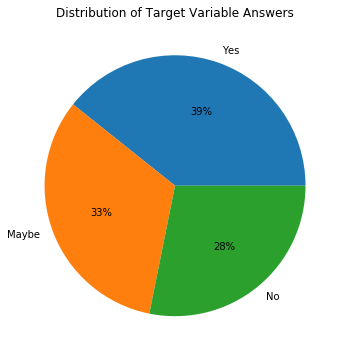

In [68]:
labels = ['Yes', 'Maybe' , 'No']
sizes =encoded_df_789['comfortable_discussing_with_supervisor'].value_counts(normalize = True)
plt.figure(figsize=(6,6))
plt.pie(sizes, labels = labels,  autopct='%1.0f%%')
plt.title('Distribution of Target Variable Answers')
plt.show()

Since we have a relatively even distribution of each class in our target variable, we can also resample our data as a whole rather than just by classes.

#### Resampling Data as a Whole

Resample the data as a whole, separate input features and target variable, build random forest classifier, show score

In [51]:
df_all_resampled = resample(encoded_df_789, replace=True, n_samples=1115*2, random_state=0) 

df_all_y_resampled = df_all_resampled.comfortable_discussing_with_supervisor
df_all_X_resampled = df_all_resampled.drop('comfortable_discussing_with_supervisor', axis=1)
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(df_all_X_resampled, df_all_y_resampled, test_size=0.2, random_state=0)

clf_2_all = RandomForestClassifier(criterion = 'gini', n_estimators = 200, random_state = 0)  
clf_2_all.fit(X_train_all, y_train_all) 
clf_2_all.score(X_test_all,y_test_all) 

0.9170403587443946

Show distribution of classes when resampling the data as a whole

In [52]:
df_all_resampled['comfortable_discussing_with_supervisor'].value_counts()

1    918
2    731
0    581
Name: comfortable_discussing_with_supervisor, dtype: int64

Grid Search for Random Forests on resampled data:

In [53]:
#GridSearchCV
parameters = {'criterion': ["gini", "entropy"], 
              'n_estimators':[20, 30, 40, 50, 100, 150, 200],
              'max_features' : ["auto", "sqrt", "log2"],
              'min_samples_split' : [2, 3, 4],
              'random_state': [0]}
              
grid_search_all = GridSearchCV(clf_2_all, parameters, cv = 5)
grid_search_all.fit(X_train_all, y_train_all)
scores_all = grid_search_all.cv_results_['mean_test_score']

Highest accuracy and best parameters obtained from gridsearch:

In [54]:

print(grid_search_all.best_params_)
print('Max accuracy: ', max(scores_all))

{'criterion': 'entropy', 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 100, 'random_state': 0}
Max accuracy:  0.890695067264574


Feature Importance for random forest classifier with Resampled Data:

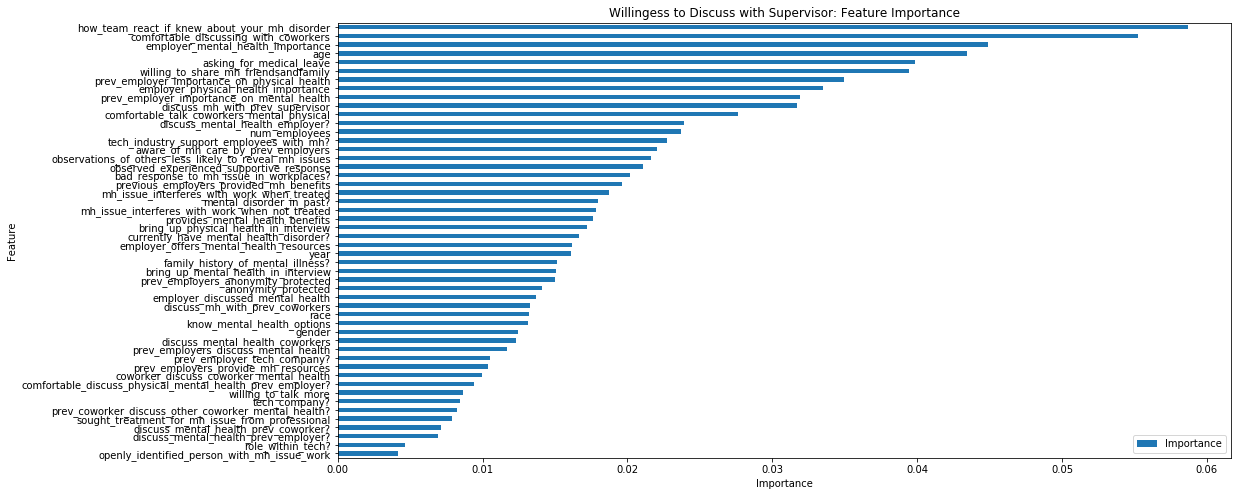

In [55]:
feat_impt_all = list(clf_2_all.feature_importances_)

y_df_all = pd.DataFrame({"Feature":X_train_all.columns,"Importance":feat_impt_all})
y_sort_df_all = y_df_all.sort_values("Importance")
dim = (16,8)
fig_all = plt.figure(figsize=dim)
ax_all = fig_all.add_subplot(111)

y_sort_df_all.plot(kind='barh',ax=ax_all,x="Feature",y="Importance")

ax_all.set_title("Willingess to Discuss with Supervisor: Feature Importance")
ax_all.set_ylabel("Feature")
ax_all.set_xlabel("Importance")

plt.show()

Finding highest accuracy for different number of features:

In [56]:
list_k = [5,10,11,12,13,14,15,16,17,18,19,20,25, 30, 35, 40, 45]
d_score_func = {'f_classif':f_classif}
scores = []
for k in list_k:
    for c in d_score_func.keys():
        selectkbest = SelectKBest(score_func = d_score_func[c], k=k)
        X_top_train = selectkbest.fit_transform(X_train_all, y_train_all)
        X_top_test = selectkbest.transform(X_test_all)
        rf_top = RandomForestClassifier(n_estimators=100, min_samples_split = 4, criterion = 'entropy', random_state=0)  
        rf_top.fit(X_top_train, y_train_all) 
        score = rf_top.score(X_top_test, y_test_all) 
        scores.append(score)
        print("Accuracy for k = %d and c = %s" %(k,c), score)

Accuracy for k = 5 and c = f_classif 0.7062780269058296
Accuracy for k = 10 and c = f_classif 0.8901345291479821
Accuracy for k = 11 and c = f_classif 0.8856502242152466
Accuracy for k = 12 and c = f_classif 0.8968609865470852
Accuracy for k = 13 and c = f_classif 0.8878923766816144
Accuracy for k = 14 and c = f_classif 0.8923766816143498
Accuracy for k = 15 and c = f_classif 0.905829596412556
Accuracy for k = 16 and c = f_classif 0.9080717488789237
Accuracy for k = 17 and c = f_classif 0.9192825112107623
Accuracy for k = 18 and c = f_classif 0.9035874439461884
Accuracy for k = 19 and c = f_classif 0.905829596412556
Accuracy for k = 20 and c = f_classif 0.9125560538116592
Accuracy for k = 25 and c = f_classif 0.9260089686098655
Accuracy for k = 30 and c = f_classif 0.9147982062780269
Accuracy for k = 35 and c = f_classif 0.9192825112107623
Accuracy for k = 40 and c = f_classif 0.9125560538116592
Accuracy for k = 45 and c = f_classif 0.9125560538116592



Highest accuracy and best number of features/metrics:

 k (number of features) = 25 

 c = f_classif 
 
 Accuracy: 0.9260089686098655


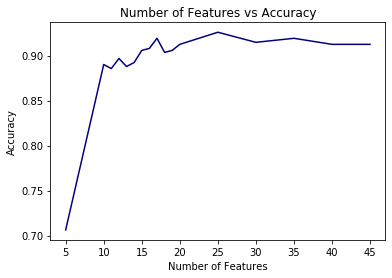

In [57]:
plt.plot(list_k, scores, color = 'navy')
plt.title('Number of Features vs Accuracy')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.show()

After examining the feature importance matrix, it may be helpful for us to remove features of little importance. We can try various numbers of features, denoted by k below, and we would use the top k features and run several random forest models. SelectKBest allows us to subset our dataframe with k columns.

In [58]:
list_k = [5,10,11,12,13,14,15,16,17,18,19,20,25, 30, 35, 40, 45]
d_score_func = {'f_classif':f_classif,
                'mutual_info_classif' : mutual_info_classif,
                 'f_regression' : f_regression,
                 'mutual_info_regression' : mutual_info_regression}
                 
f_classif_scores = []
mutual_info_classif_scores = []
f_regression_scores = []
mutual_info_regression_scores = []
for k in list_k:
    for c in d_score_func.keys():
        selectkbest = SelectKBest(score_func = d_score_func[c], k=k)
        X_top_train = selectkbest.fit_transform(X_train_all, y_train_all)
        X_top_test = selectkbest.transform(X_test_all)
        rf_top = RandomForestClassifier(n_estimators=100, min_samples_split = 4, criterion = 'entropy', random_state=0)  
        rf_top.fit(X_top_train, y_train_all)
        if d_score_func[c] == f_classif:
            score = rf_top.score(X_top_test, y_test_all) 
            f_classif_scores.append(score)
        if d_score_func[c] == mutual_info_classif:
            score = rf_top.score(X_top_test, y_test_all) 
            mutual_info_classif_scores.append(score)
        if d_score_func[c] == f_regression:
            score = rf_top.score(X_top_test, y_test_all) 
            f_regression_scores.append(score)
        if d_score_func[c] == mutual_info_regression:
            score = rf_top.score(X_top_test, y_test_all) 
            mutual_info_regression_scores.append(score)
        



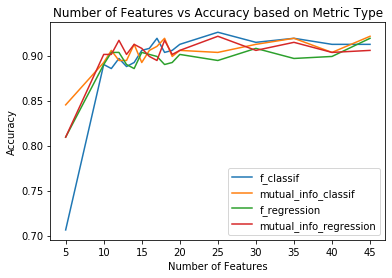

In [59]:
#Plot of Number of Features vs Accuracy based on metric type 
plt.plot(list_k, f_classif_scores, label = 'f_classif')
plt.plot(list_k, mutual_info_classif_scores, label = 'mutual_info_classif')
plt.plot(list_k, f_regression_scores, label = 'f_regression')
plt.plot(list_k, mutual_info_regression_scores, label = 'mutual_info_regression')
plt.title('Number of Features vs Accuracy based on Metric Type')
plt.legend()
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.show()

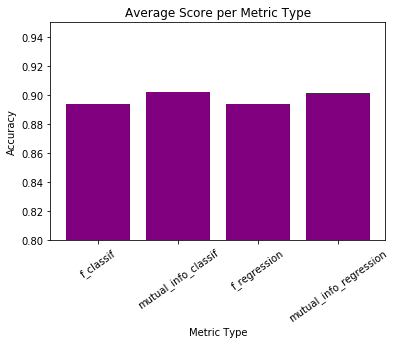

In [60]:
#Bar Plot of Average Accuracy based on Metric Type
metric_category = ['f_classif', 'mutual_info_classif', 'f_regression', 'mutual_info_regression']
scores_list = [f_classif_scores, mutual_info_classif_scores,  f_regression_scores, mutual_info_regression_scores]
average_scores = []
for scores in scores_list:
    average_score = np.average(scores)
    average_scores.append(average_score)
plt.ylim(0.80, 0.95)
plt.bar(metric_category, average_scores, color = 'purple')
plt.xlabel('Metric Type')
plt.xticks(rotation = 35)
plt.ylabel('Accuracy')
plt.title('Average Score per Metric Type')
plt.show()



#### Resample by Race categories

In [61]:
dic_race = {'I prefer not to answer': 0, 'White' : 1, 'Asian' :2,'Black or African American' : 3, 'American Indian or Alaska Native' : 4, 'Hispanic' :5, 'More than one of the above': 6}



In [63]:
df = pd.DataFrame({"Race Category" : list(dic_race.keys()), "Count" : encoded_df_789['race'].value_counts().tolist()})
df

Race Category  Count
0            I prefer not to answer    703
1                             White    356
2                             Asian     27
3         Black or African American     17
4  American Indian or Alaska Native     10
5                          Hispanic      1
6        More than one of the above      1

Try different sample sizes to resample data by race, separate input features and target variable, run random forest classifier, get score for each sample size:


In [64]:
num_samples = [20, 25, 30, 50, 60, 75, 100, 200, 400, 500, 700]
scores_rf = []
for samp in num_samples:
        no_answer = encoded_df_789[encoded_df_789['race']==0]
        white = encoded_df_789[encoded_df_789['race']==1]
        asian = encoded_df_789[encoded_df_789['race']==2]
        black = encoded_df_789[encoded_df_789['race']==3]
        am_ind = encoded_df_789[encoded_df_789['race']==4]
        hisp = encoded_df_789[encoded_df_789['race']==5]
        more_than_one = encoded_df_789[encoded_df_789['race']==6]

        df_no_ans_resampled = resample(no_answer, 
                                        replace=True,     
                                        n_samples=samp,    
                                        random_state=0) 

        df_white_resampled = resample(white, 
                                        replace=True,     
                                        n_samples=samp,    
                                        random_state=0) 

        df_asian_resampled = resample(asian, 
                                        replace=True,     
                                        n_samples=samp,    
                                        random_state=0) 

        df_black_resampled = resample(black, 
                                        replace=True,     
                                        n_samples=samp,    
                                        random_state=0) 

        df_am_ind_resampled = resample(am_ind, 
                                        replace=True,     
                                        n_samples=samp,    
                                        random_state=0) 
        
        df_hisp_resampled = resample(hisp, 
                                        replace=True,     
                                        n_samples=samp,    
                                        random_state=0) 
        
        df_more_resampled = resample(more_than_one, 
                                        replace=True,     
                                        n_samples=samp,    
                                        random_state=0) 

        df_resampled = pd.concat([df_no_ans_resampled, df_white_resampled, df_asian_resampled, df_black_resampled, df_am_ind_resampled, df_hisp_resampled, df_more_resampled])

        # Display new class counts
        print(df_resampled["comfortable_discussing_with_supervisor"].value_counts())

        y_resampled = df_resampled.comfortable_discussing_with_supervisor
        X_resampled = df_resampled.drop('comfortable_discussing_with_supervisor', axis=1)
        X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0) 


        clf_3_r = RandomForestClassifier(criterion = 'gini', n_estimators = 200, random_state = 0)  
        clf_3_r.fit(X_train_r, y_train_r)
        sc = clf_3_r.score(X_test_r,y_test_r) 
        scores_rf.append(sc)
        print("Accuracy with n_samples = %d: " %(samp), sc)
print(max(scores_rf))


1    52
0    52
2    36
Name: comfortable_discussing_with_supervisor, dtype: int64
Accuracy with n_samples = 20:  0.8214285714285714
0    67
1    61
2    47
Name: comfortable_discussing_with_supervisor, dtype: int64
Accuracy with n_samples = 25:  0.8571428571428571
0    78
1    77
2    55
Name: comfortable_discussing_with_supervisor, dtype: int64
Accuracy with n_samples = 30:  0.8809523809523809
0    132
1    125
2     93
Name: comfortable_discussing_with_supervisor, dtype: int64
Accuracy with n_samples = 50:  0.8571428571428571
0    160
1    146
2    114
Name: comfortable_discussing_with_supervisor, dtype: int64
Accuracy with n_samples = 60:  0.8333333333333334
0    198
1    181
2    146
Name: comfortable_discussing_with_supervisor, dtype: int64
Accuracy with n_samples = 75:  0.8761904761904762
0    258
1    250
2    192
Name: comfortable_discussing_with_supervisor, dtype: int64
Accuracy with n_samples = 100:  0.95
1    515
0    499
2    386
Name: comfortable_discussing_with_superviso

Resample to generate more data and balance representation across races using sample size that achieved best score above, separate input features and target variable, run random forest classifier, show score

In [65]:
no_answer = encoded_df_789[encoded_df_789['race']==0]
white = encoded_df_789[encoded_df_789['race']==1]
asian = encoded_df_789[encoded_df_789['race']==2]
black = encoded_df_789[encoded_df_789['race']==3]
am_ind = encoded_df_789[encoded_df_789['race']==4]
hisp = encoded_df_789[encoded_df_789['race']==5]
more_than_one = encoded_df_789[encoded_df_789['race']==6]

df_no_ans_resampled = resample(no_answer, 
                                replace=True,     
                                n_samples=100,    
                                random_state=0) 

df_white_resampled = resample(white, 
                                replace=True,     
                                n_samples=100,    
                                random_state=0) 

df_asian_resampled = resample(asian, 
                                replace=True,     
                                n_samples=100,    
                                random_state=0) 

df_black_resampled = resample(black, 
                                replace=True,     
                                n_samples=100,    
                                random_state=0) 

df_am_ind_resampled = resample(am_ind, 
                                replace=True,     
                                n_samples=100,    
                                random_state=0) 

df_hisp_resampled = resample(hisp, 
                                replace=True,     
                                n_samples=100,    
                                random_state=0) 

df_more_resampled = resample(more_than_one, 
                                replace=True,     
                                n_samples=100,    
                                random_state=0) 

df_resampled = pd.concat([df_no_ans_resampled, df_white_resampled, df_asian_resampled, df_black_resampled, df_am_ind_resampled, df_hisp_resampled, df_more_resampled])

# Display new class counts
print(df_resampled["comfortable_discussing_with_supervisor"].value_counts())

y_resampled = df_resampled.comfortable_discussing_with_supervisor
X_resampled = df_resampled.drop('comfortable_discussing_with_supervisor', axis=1)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0) 


clf_3_r = RandomForestClassifier(criterion = 'gini', n_estimators = 200, random_state = 0)  
clf_3_r.fit(X_train_r, y_train_r)
preds = clf_3_r.predict(X_test_r)
sc = clf_3_r.score(X_test_r,y_test_r) 
sc


0    258
1    250
2    192
Name: comfortable_discussing_with_supervisor, dtype: int64


0.95

In [66]:
X_agg = X_test_r
X_agg['correct'] = preds == y_test_r

correct = X_agg[['race', 'correct']].groupby('race').mean()['correct'].tolist()

df_correct = pd.DataFrame({"Race Category" : list(dic_race.keys()), "Correct" : correct})
df_correct


Race Category   Correct
0            I prefer not to answer  0.772727
1                             White  0.833333
2                             Asian  1.000000
3         Black or African American  1.000000
4  American Indian or Alaska Native  1.000000
5                          Hispanic  1.000000
6        More than one of the above  1.000000

# Conclusion and Takeaways

- Of all classifiers, Random Forest performed the best overall.
- Results:
    - 2016-2019 data
        - Initial Selected Features
        - Initial Selected Features (w/o gender)
        - 
    - 2017-2019 data
    
